# Flight Crahses Exploration
### by Moustafa Ibrahim Ascoura

## Preliminary Wrangling

> The following project is the preparation and visualisation of the Flight Crashes Dataset from this link: https://www.kaggle.com/ruslankl/airplane-crashes-data-visualization. It is a record of more than 5000 crashes from the year 1908 to 2009.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
flights = pd.read_csv('Airplane_Crashes.csv')

### What is the structure of your dataset?

> The dataset has 5268 rows and 12 columns: <ul><li>Date, time, location of the accident</li><li>Flight number, type, route, registeration number, and operator of the aircraft</li><li> Number of people aboard and how many died and how many survived?</li><li>A summary of the flight and the accident</li>  
</ul>

In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


>We are not interested in columns such as: Flight number, Registeration, CN/IN, and Summary. So they will be removed from the dataset

In [3]:
flights.drop(columns=['Flight #', 'Registration', 'cn/In', 'Summary'], inplace=True);

In [4]:
flights['Time'] = pd.to_datetime(flights['Time'], errors='coerce').dt.time;
flights['Date'] = pd.to_datetime(flights['Date']);

In [5]:
#Assign "Commercial" to route value for airplanes between two cities
routes = []
for x in flights.Route:
    if x not in ["Training", "Sightseeing", "Test flight", "Test"]:
        x = "Commercial"
    routes.append(x)
flights['Route'] = pd.Series(routes)

In [6]:
flights.isnull().sum()

Date             0
Time          2219
Location        20
Operator        18
Route            0
Type            27
Aboard          22
Fatalities      12
Ground          22
dtype: int64

In [7]:
flights.nunique()

Date          4753
Time           987
Location      4303
Operator      2476
Route            5
Type          2446
Aboard         239
Fatalities     191
Ground          50
dtype: int64

> Significant Number of Time values are missing, we can neglect this in our analysis. The other columns are fine with insignificant null values.

### What is/are the main feature(s) of interest in your dataset?

> The columns of interest are <ol>
    <li>Dates and Times of Accident: <em>To see if the accidents are time-related</em></li>
    <li>Route and Type of the aircraft</li>
    <li>Fatalities and Ground (survivors): <em>As this is a good measure of the severity of the accident</em></li>    
    </ol>
    
>We have two major questions to answer: The first is if the number of accidents are decreasing over the years. The second one is if the type or route of the aircraft has a role in causing it to crash? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The top two columns I will be looking for is the type and fatalities associated with each accident. Types of aircraft can show if a certain type has engineering problems that are causing it to fail, or is the a human error that is causing these accident?

# Univariate Exploration

 ### Number of Accident per Year

> How are the accidents numbers doing through the years?

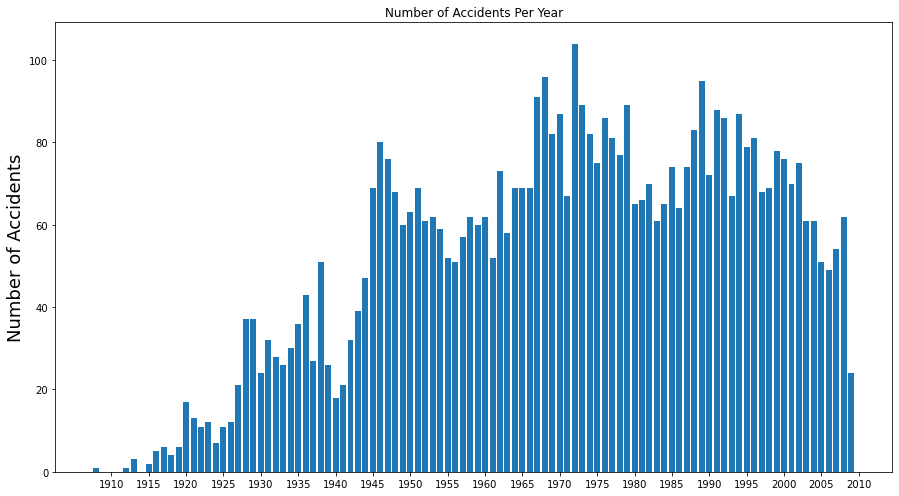

In [23]:
plt.figure(figsize=[ 15, 8.27])
years = flights.Date.dt.year.value_counts()
plt.bar(years.index,years);
plt.xticks([int(x) for x in range(1910, 2015, 5)]);
plt.ylabel("Number of Accidents", fontsize=18);
plt.title("Number of Accidents Per Year", fontweight = 10);

<em><mark>Comment</mark></em>
We see that the numbers of the accidents are increasing, does that mean we are getting worse at driving airplanes? Of course not. This can be justified as the numbers of airplanes produced each year also increases. Then it is not fair to judge the safety development from this graph only, we need to graph the ratio (probability) of the accidents (Accident/Number of flights per year)

I can't get access to the number of flights per year. So we won't be able to see this graph, but I had to clarify.

### Most Airplane Type Crashed?

Reputation in the air transport industry is a crucial thing. Passengers won't fly in a jet that is 0.01 less safer than its competitive, would you? So let's take a look at what is the most type that has crashed in the last century. <em>We'll consider only the top 20 crashed.</em>

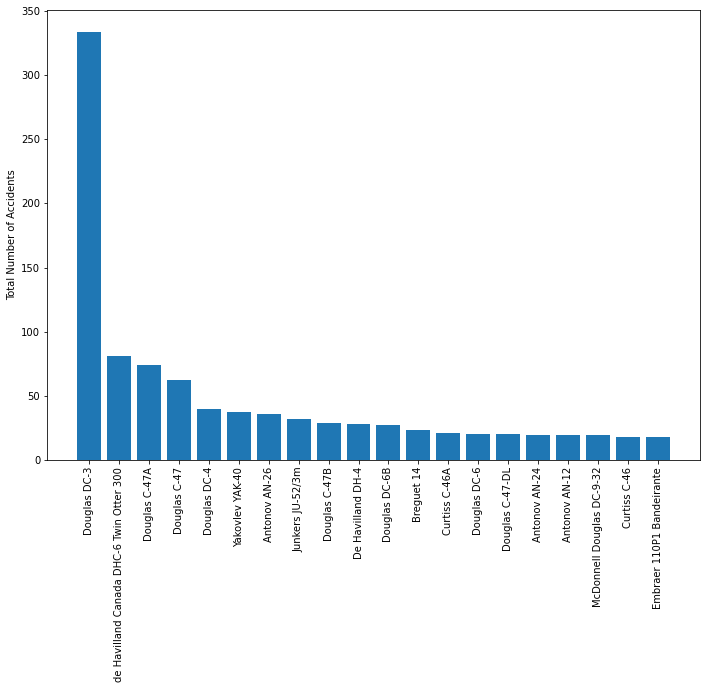

In [9]:
typs = flights.Type.value_counts()[:20]
plt.figure(figsize=[ 11.69, 8.27])
plt.bar(typs.index, typs)
plt.xticks(rotation = 90);
plt.ylabel("Total Number of Accidents");


<em><mark>Comment</mark></em>
We can see that Douglas DC-3 aircraft is the most plane type that crashed in the last century by a big margin. This is because it was the most popular cargo aircraft in its era. The airliner produced above 600 ones of this type. This was a big deal back then. US relied heavily on it during the WWII; this might also explain the high number of crashes.

### So.. Is Douglas DC-3 The Worst Aircraft Ever?

Not exactly. To inspect this further, let's first take a look at the fatality rate and timeline of the accidents of this sepcific Airliner.

C:\Users\MoustafaAscoura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


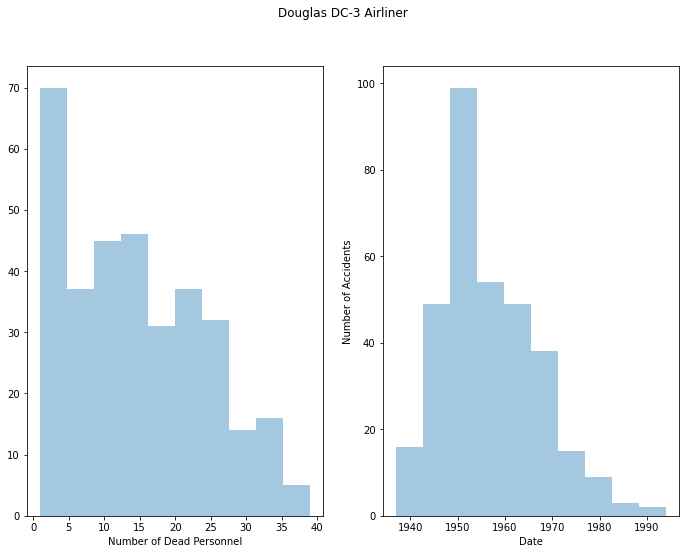

In [10]:
doug = flights.query("Type == 'Douglas DC-3'")
plt.figure(figsize=[ 11.69, 8.27])
plt.suptitle("Douglas DC-3 Airliner")

plt.subplot(1,2,1)
sb.distplot(doug.Fatalities, bins=10, kde=False);
plt.xlabel("Number of Dead Personnel")

plt.subplot(1,2,2)
sb.distplot(doug.Date.dt.year, bins=10, kde=False);
plt.ylabel("Number of Accidents");


<em><mark>Comment</mark></em>
Unfortuanetly, judging from the data in hand, we can say that's true. It was one of the earliest commercial airplanes. Most crashes had less than 5 people aboard meaning that it was a cargo flight. Average deaths per accident is between 10 and 20 persons.

It also had its most accidents during the period from 1945 to 1965. We were not as good in building aircrafts. But there's a spike in the number of accidents in 1950:1955 which draws attention and requires extra research.

### How Many Deathes per Accident?

Now, back to our dataset, let's plot the distribution of deaths.

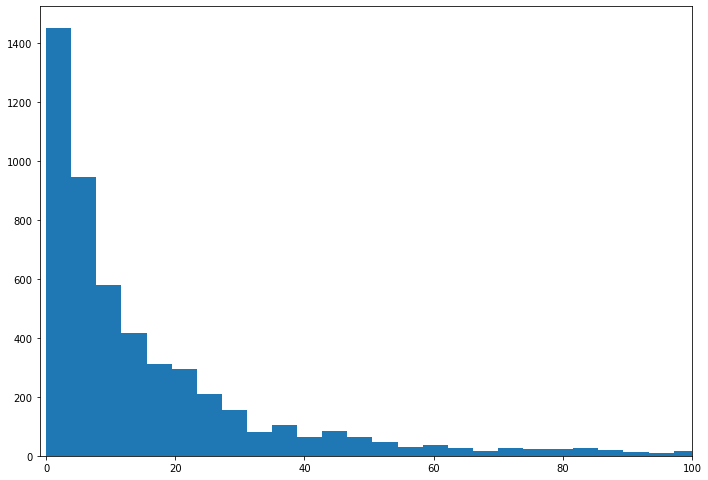

In [11]:
plt.figure(figsize=[ 11.69, 8.27])
plt.hist(flights.Fatalities, bins=150)
plt.xlim(-1,100);

<em><mark>Comment</mark></em>

The plot is right-skewed. Most accidents had less than 10 fatalities, probably the flight crew only. Very few flights had more than 80 victims. 

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

All distributions seems logical and justificable. All outliers were ignored to beautify the graphs. No axes transformation were neccessay nor relative consideration of variables.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Only some types of variables were changed to be able to wrangle with it.

# Bivariate Exploration

## Number of Total Fatalitites each year?

In [12]:
flights['year'] = flights.Date.dt.year
stats = pd.DataFrame(flights.groupby(by=['year']).sum())

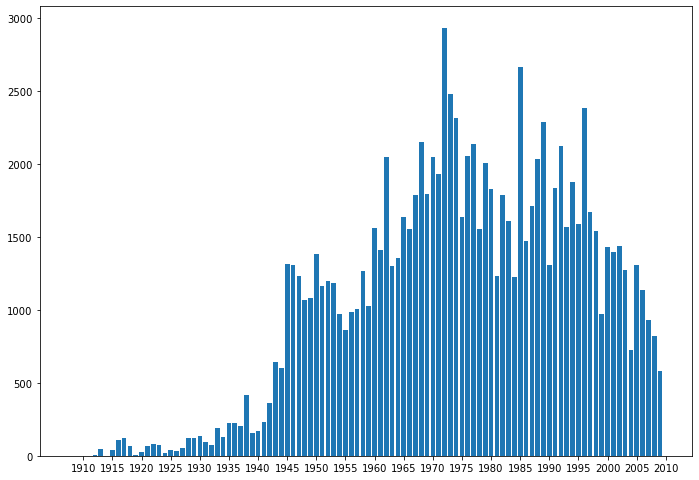

In [13]:
plt.figure(figsize=[ 11.69, 8.27]);
plt.bar(data = stats, x = stats.index, height = stats.Fatalities);
plt.xticks(list(range(1910, 2015, 5)));

<em><mark>Comment</mark></em>
As expected, this graph matches that of number of accidents per year.

## Were the most fatalities Are?
Which cities and locations had the most deaths?

In [14]:
locs = pd.DataFrame(flights.groupby(by=['Location']).sum())
locs.sort_values(by = ['Fatalities'], ascending=False, inplace=True);
locs.drop(labels = ['year', "Aboard"], axis = 1, inplace=True)

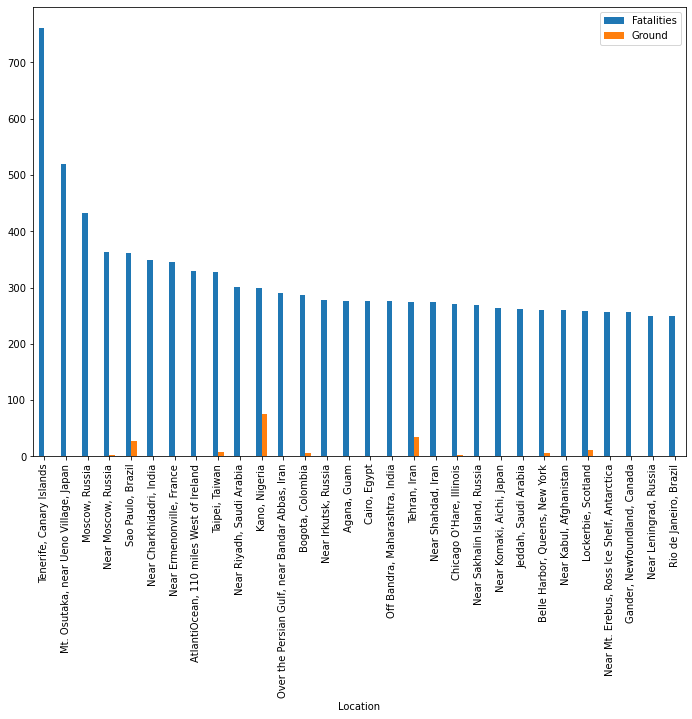

In [15]:
locs.head(30).plot(kind="bar", figsize=(11.69, 8.27));

<em><mark>Comment</mark></em>
Canary Islands came first with over 750 fatalities. The second place was Japan with a bit more than 500 victims. The rest has almost 300+ victims.

## Most Accidents occur at what time of the day? Is it harder to save people at night?

Let's see the effect of the time of the day over the number of deaths and survivors. <em>We will drop the null values of the time column for this plot only.</em>

In [16]:
timed = flights.dropna(subset=['Time']);
timed['hour'] = [x[0:2] for x in timed.Time.to_string(index = False).split()]
timed.sort_values(inplace=True, by = ['hour']);
ftimed = timed.groupby(by=['hour']).sum()
ftimed.drop(columns=['Aboard', 'year'], inplace = True);

<ipython-input-16-e3a0771127d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed['hour'] = [x[0:2] for x in timed.Time.to_string(index = False).split()]
<ipython-input-16-e3a0771127d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timed.sort_values(inplace=True, by = ['hour']);


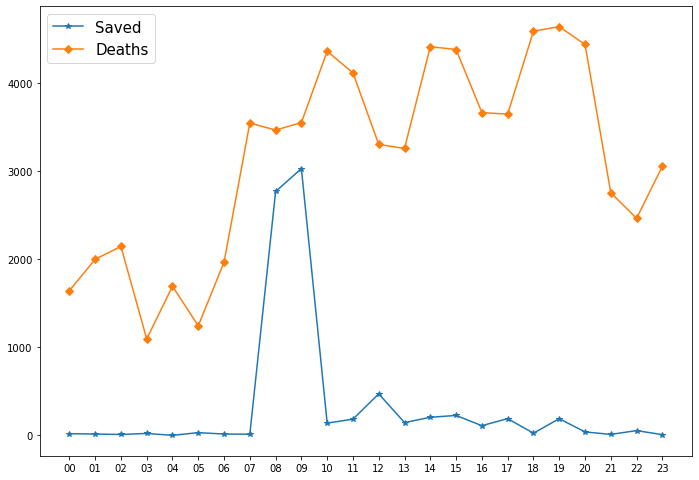

In [17]:
plt.figure(figsize=[ 11.69, 8.27])
plt.plot(ftimed.index, ftimed.Ground, linestyle='-', marker='*')
plt.plot(ftimed.index, ftimed.Fatalities, linestyle='-', marker='D')
plt.legend(["Saved", "Deaths"], fontsize=15);


<em><mark>Comment</mark></em> <br>
Accidents with most deaths occured between 7 am and 10 am. This is againt intuition as one may think that severe accidents are those at night, or at least more accidents will be at night thus more deaths then. 

The second line shows the that accidents at daytime had more resuced people than those at night (from 9 pm to 5 am). This is pretty logical as search and rescue operations are harder at night. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is consistency between the (Accidents per year) and (Deaths per year) graph. What is interesting is the last graph where the number of survivors are high during day time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The Canary island has the most number of deaths as it lies near the Atlantic Ocean, which also is interesting and kind of expected.

# Multivariate Exploration

## For the top 10 types of aircrafts with the most accidents, let's draw a relation between the years and fatalities to see what year was the worst for each of them.

In [18]:
#List of top 10 aircrafts
top10 = flights.Type.value_counts().head(9).index

#Filter entries from the database
top10df = flights[flights["Type"].isin(top10)]

#Group by Year
top10df = top10df.groupby(by=["Type", "year"]).sum().reset_index()


C:\Users\MoustafaAscoura\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


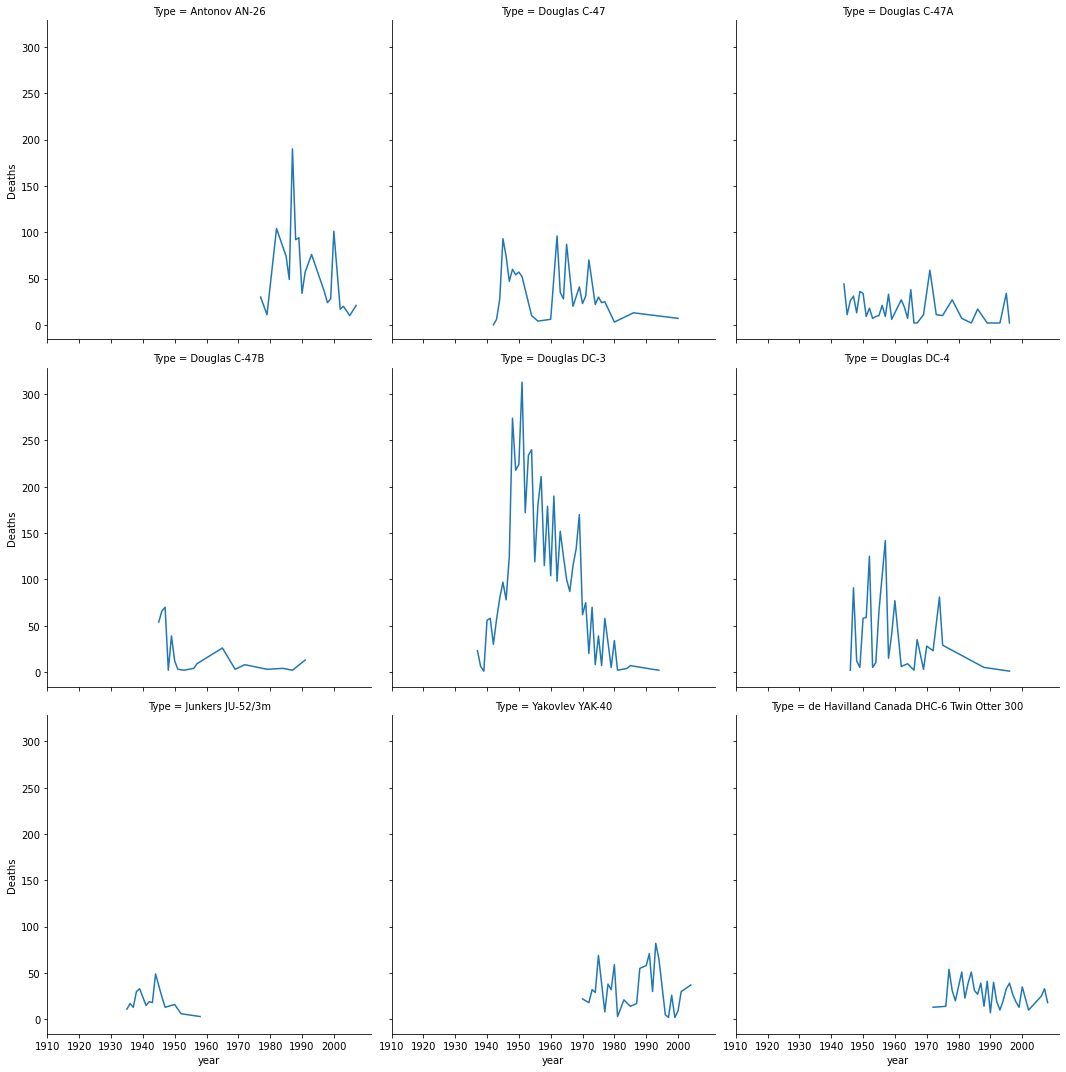

In [19]:
g = sb.FacetGrid(data = top10df, col = 'Type', col_wrap = 3, size = 5, margin_titles = True)
g.map(sb.lineplot, 'year', 'Fatalities')
g.set_ylabels('Deaths')
g.set(xticks=range(1910, 2010, 10));


<em><mark>Comment</mark></em> <br>
Now we can see how some airplanes have the highest numbers of accidents and most recent ones such as Douglas C-47, YAK-40, DHC-6, and AN-26. These all are mostly cargo planes as the deaths are not high.

Next, we'll investigate the top 6 operators that lost airplanes. An operator is the company or entity that owns the aircraft, an operator can have more than one type.

## For the top 5 Aircraft Operators with the most accidents, let's draw a relation between the years and fatalities to see what year was the worst for each of them.

In [20]:
#List of top 5 operators
top5 = flights.Operator.value_counts().head(5).index

#Filter entries from the database
top5df = flights[flights["Operator"].isin(top5)]

<Figure size 841.68x595.44 with 0 Axes>

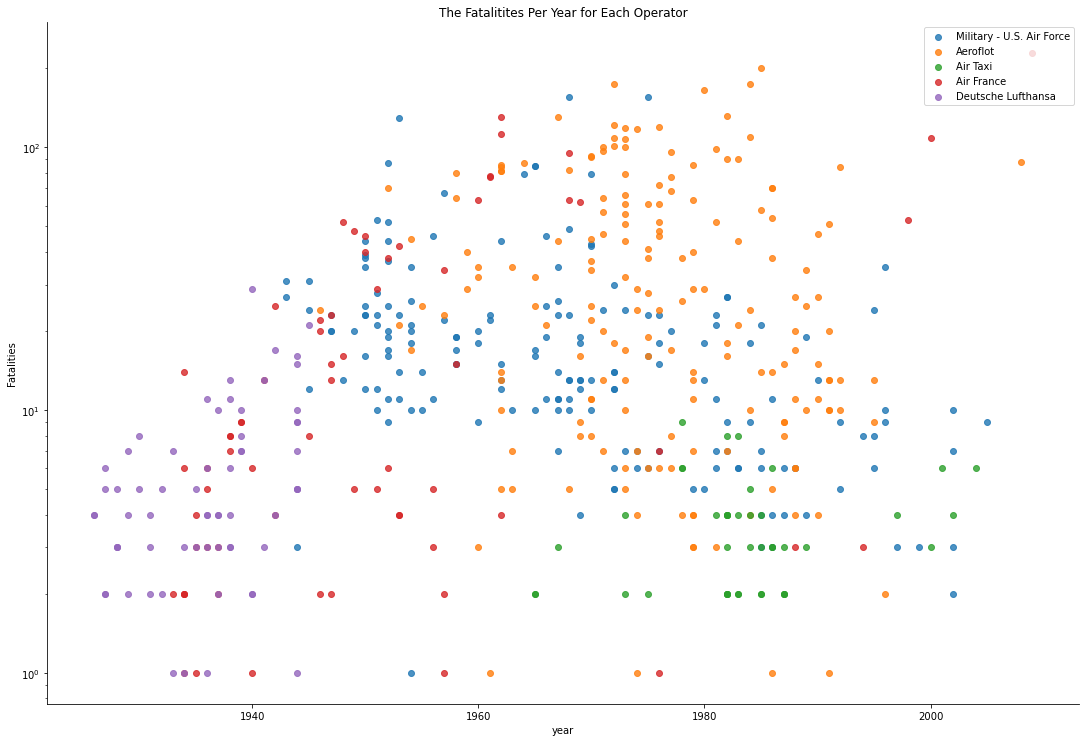

In [22]:
plt.figure(figsize=[ 11.69, 8.27]);
sb.lmplot( x="year", y="Fatalities", data=top5df, fit_reg=False, hue='Operator', legend=False, height=10, aspect=1.5);
plt.yscale('log');
plt.title("The Fatalitites Per Year for Each Operator");
plt.legend(loc='upper right');

<em><mark>Comment</mark></em> <br>
It is apparent that the USAF is the operator who had most accidents and lost more lives. This is because it is the operator that tests new aircrafts and engage in dangerous maneuvers and flights. 

We can also notice that civil operators such as Air France and Lufthanthsa declined in number of victims and became safer in later years. While Aeroflot, which is the oldest airliner in the world, has a significant number of losses in the last 4 decades. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Some aircrafts crash more frequently than others in different periods of time. That gives us a overview of when and how these manufacturers are developing themselves and how these bad eperiences help improve the safety of the flights.

>Also, the operators of these aircrafts seemed to use them in a different way which resulted in variation of victim numbers over the years.

### Were there any interesting or surprising interactions between features?

> Not very surprising, it was expected. Each airliner curve has the same trend, which starts with a high number of accidents and then it will decline with time. The unusual one was that of Aeroloft, which had an increase in numbers of victims in the last 4 decades.